 # **Desafio - Bootcamp Data Science na Prática II**


 ## **Entendendo o Problema**

Os dados sobre preços de abacate e volume de vendas nos EUA foram coletados em 2018 no site da Hass Avocado Board - HAB (https://hassavocadoboard.com/) e disponibilizados na comunidade Kaggle (https://www.kaggle.com/neuromusic/avocado-prices).
O objetivo do desafio é predizer a média dos preços de abacates. <br>

### **A ironia na motivação**

A análise proposta no Kaggle indica que a geração dos millennials não compram casa porque consomem muito Avocado Toast e que essa situação poderia mudar caso encontrassem uma cidade com abacates baratos. A titulo de curiosidade, questiono: seria isso verdade ou uma ironia ? 

Segundo o milionário Tim Gurner, seria verdade. Em 2017, ele disse que a geração dos millennials não tinham dinheiro para comprar uma casa porque comiam muito Avocado Toast (vendidos na época por cerca de $19). Porém, foi muito ironizado pela comparação e também por não analisar o contexto geral da geração, como por exemplo: terem dívidas em financiamento estudantil ou os preços muito elevados dos imóveis devido escassez  (fonte: https://www.washingtonpost.com/news/food/wp/2017/05/15/dont-mess-with-millennials-avocado-toast-the-internet-fires-back-at-a-millionaire/) <br>
![alt text](https://drive.google.com/uc?export=view&id=1SLt1e0AcAyIV9cOPAyBfcauIYb_79HPK)

Prevendo o preço médio dos abacates, poderemos também verificar em quais cidades eles terão um preço menor. <br>
Bora "ajudar" os millennials ? rss


## **Entendendo os Dados**

### **Coleta dos Dados**

In [139]:
# Importação de bibliotecas
import pandas as pd           # Renomeando a biblioteca pandas para pd
import numpy as np            # Renomeando a biblioteca numpy para np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
# Importando arquivo csv
df = pd.read_csv('/content/sample_data/avocado.csv', sep=',', index_col=0)

# Conferindo se o acesso está ok e realizando primeira análise do dados
df.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


### **Descrição das colunas**

Há vários tipos de abacates. Nos Estados Unidos o mais vendido é a variedade Hass. O preço e tamanho da fruta podem ser identificados pelo código PLU. Os abacates também são vendidos em sacos de rede, em tamanhos variados. 
*(Fonte: https://loveonetoday.com/how-to/identify-hass-avocados/)*. Os abacates orgânicos utilizam o mesmo código PLU, acrescido do prefixo 9 (*https://en.wikipedia.org/wiki/Price_look-up_code*). 

Após breve pesquisa e visualização inicial das colunas e valores, pude concluir que:
* Cada linha do dataset apresenta o preço médio e a quantidade de abacates vendidos em algum estado dos EUA por semana. 
* O dataset utiliza a coluna "type" para representar se o abacate é organico ou não. Considerando que utilizam o mesmo código PLU não havia necessidade de criar mais três colunas para identificar os orgânicos. 
* A coluna "Total Volume" apresenta a soma das colunas 4046, 4225, 4770 e TotalBags
* A coluna "TotalBags" apresenta a soma das colunas Small Bags, LargeBags e xLargeBags

![alt text](https://drive.google.com/uc?export=view&id=12j34irt5g2BO7dtRVA4VBdD4kUHyfbvt)



### **Descrição dos dados**


In [141]:
# Tamanho do DataFrame (linhas, colunas)
df.shape

(18249, 13)

In [142]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


Podemos verificar:
 

*   Não há dados faltantes no dataset
*   As colunas que apresentam a quantidade de abacates vendidos são do tipo float. O que gera a dúvida em relação a representar a quantidade ou o volume (quilograma, onças etc) de abacates vendidos. Analisaremos em outro momento
* Temos a coluna "AveragePrice" que é a variável target, ou seja, o dado que queremos prever

In [143]:
# Descrição estatística
dataframe.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Podemos verificar que o dataset apresenta dados entre os anos 2015 e 2018 

Analisando o preço médio do abacate, podemos concluir que há muita diferença de preço no dataset, pois o preço médio minimo é 0.44 enquanto o  máximo é 3.25. Pode ser por conta do valor do abacate ter aumentado ao longo dos anos ou por haver outliers. 

### **Exploração dos dados**

##### **Colunas de quantidades, do tipo float** 
Na falta de um dicionário de dados da própria HAS, analisei uma amostra dos dados e comparei com o número de vendas apresentadas no site da HAS. 

In [144]:
# Consultando amostra
# Estado Albany - Semana 07 de janeiro de 2018 - Abacate Convencional
df.query('Date <= "2018-01-21" and Date >= "2018-01-14" & region == "Albany" & type == "organic"')


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9,2018-01-21,1.54,3346.54,14.67,253.01,0.0,3078.86,3078.86,0.0,0.0,organic,2018,Albany
10,2018-01-14,1.47,4140.95,7.30,301.87,0.0,3831.78,3831.78,0.0,0.0,organic,2018,Albany


![alt text](https://drive.google.com/uc?export=view&id=1imoZay05ySHl0lOSZaAtd-J8dxtMhpRd)

Comparando os dados apresentados no site com os dados do dia 14, pude comprovar que a coluna é utilizada como se fosse unidade de abacate e o valor é arredondado para apresentação. Divergências:
* O motivo das colunas serem do tipo float ainda não foi compreendido. A hipótese seria ter havido algum engano na coleta inicial dos dados disponibilizados. 
* O site cita que os dados são da semana que termina no dia 21, porém apresenta os dados da semana que termina no dia dia 14. 

In [145]:
# Quantidade por tipo de abacate
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [146]:
# De quais anos são os dados 
df['year'].unique()

array([2015, 2016, 2017, 2018])

In [147]:
# Quantidade registros de abacates vendidos por região 
df['region'].value_counts()

California             338
Columbus               338
DallasFtWorth          338
RaleighGreensboro      338
HartfordSpringfield    338
Louisville             338
Tampa                  338
Houston                338
Plains                 338
NorthernNewEngland     338
Pittsburgh             338
TotalUS                338
Spokane                338
SanDiego               338
CincinnatiDayton       338
Detroit                338
BuffaloRochester       338
StLouis                338
Portland               338
HarrisburgScranton     338
Roanoke                338
Boston                 338
NewYork                338
Indianapolis           338
Albany                 338
LasVegas               338
GrandRapids            338
Jacksonville           338
Atlanta                338
GreatLakes             338
Syracuse               338
Boise                  338
Southeast              338
SanFrancisco           338
Chicago                338
PhoenixTucson          338
Philadelphia           338
C

Considerando que temos dados de 4 anos, teriamos aproximadamente 208 semanas.Porém como temos dois tipos de abacates, teriamos o dobro dos registros, ou seja, 416. Como a maioria tem 338 registros, demonstra que não temos dados de todas semanas. Hipótese de algum ano não estar completo. 

In [148]:
# Em qual ano está a diferença dos dados 
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

O ano de 2018 não está completo 

In [149]:
# Os dados são de qual região 
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [150]:
# Qual volume total de abacates vendidos por tipo 
df.groupby('type')['Total Volume'].agg(['sum']).round()

,sum
type,
conventional,1.508722e+10
organic,4.361817e+08


In [151]:
# Qual o preço médio dos abacates vendidos por tipo
df.groupby('type')['AveragePrice'].agg(['mean']).round(2)

,mean
type,
conventional,1.16
organic,1.65


### **Visualização das informações**



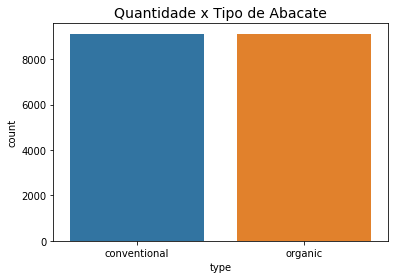

In [ ]:
# Gráfico quantidade x tipo de abacate
sns.countplot(x=df['type'])
plt.title('Quantidade x Tipo de Abacate',fontsize=14)
plt.show()

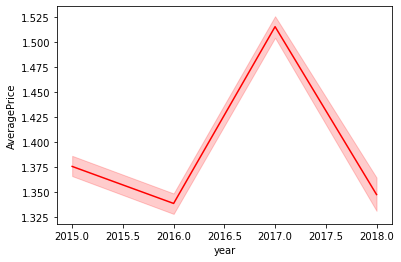

In [152]:
# Distribuição da Média de preços pelos valores da coluna Ano
sns.lineplot(x = df['year'], y = df['AveragePrice'], color = "red")

# Comando da biblioteca matplotlib para apresentar no output o gráfico criado
# anteriormente. 
plt.show()

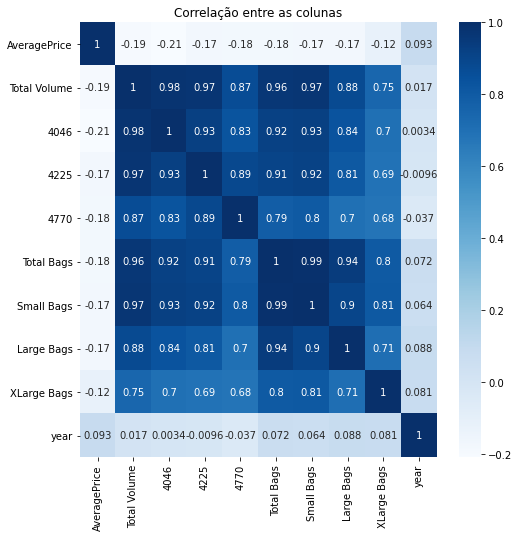

In [153]:
# Matriz de Correlação
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap="Blues",annot=True)
plt.title("Correlação entre as colunas")
plt.show()

Podemos verificar que há pouca correlação entre a media de preço e as demais variáveis. É mais influenciado pelo ano. <br>


## **Preparando os Dados**

### **Excluindo Colunas** 

In [154]:
# Excluindo coluna Date pois já temos a coluna ano 
df.drop(columns='Date', axis = 1, inplace = True)

In [155]:
# Verificando quais colunas permaneceram no DataFrame
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

## **Modelagem de Dados**

Vamos predizer os preços médios dos abacates, utilizando um modelo de Regressão Linear. 

In [156]:
# Importação das bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [158]:
# Armazenamento dos valores da coluna AveragePrice na variável y
y = df['AveragePrice']  
# Armazenamento dos valores das outras colunas restantes na variável X
X = df.drop(['AveragePrice'], axis = 1)

In [195]:
# Transformando as variáveis categóricas em numéricas
X = pd.get_dummies(X)

# Separando o dataset em parcelas de teste e treino de validação 
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state = 42)

array([1.07889557, 1.12187555, 1.65312136, ..., 1.6717819 , 1.38633238,
       1.62293558])

### **Regressão Linear**

In [196]:
# Instanciando a regressão
lr = LinearRegression()

# Treinando o modelo
modelo = lr.fit(X_train, y_train)

In [197]:
# Predição dos preços médios dos abacates
y_pred = lr.predict(X_test)

In [198]:
 # Acurácia do modelo criado
 r2_score(y_test, y_pred)

0.550200403020398

#**Resultado Inicial**
O modelo de Regressão Linear possui uma porcentagem de acerto parcialmente satisfatória (cerca de 55,02%) para predizer a média de preços dos abacates.

## **Modelagem com Arvore de Decisão**

In [127]:
# Importação das bibliotecas
from sklearn.tree import DecisionTreeRegressor

In [128]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X, y)

# Predict
y_pred = regr_1.predict(X)

In [129]:
from sklearn.metrics import r2_score # quanto mais proximo de 1 melhor o modelo
print(r2_score(y, regr_1.predict(X)))

0.7681158067555673


In [130]:
from sklearn.metrics import mean_absolute_error  # desvio médio entre observado e predito.
mean_absolute_error(y, y_pred)

0.13802094435165818

## **Resultado Final**

O resultado da predição com Árvore de Decisão teve um resultado melhor (76,81%) do que com Regressão Linear (55,02%)

In [134]:
#gerando um dataset com dados reais e dados preditos 
X_train.shape
X.shape

(18249, 65)